In [41]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display
from matplotlib.animation import FuncAnimation
from IPython.display import HTML 
    
def plot_signal (xn):
    plt.plot(xn)
    plt.show()
    
def plot_complex_signal (xn):
    plt.plot(xn.real)
    plt.plot(xn.imag)
    plt.show()

## Discrete  Fourier Transformation

**Fourier analysis** is a simple change of basis.
- a change of basis is a change of perspective
- a change of perspective can reveal things
    - if the basis is good enough
        
Overview

1. Fourier basis for $\mathbb{C}^N $
2. Fourier basis is orthogonal 
3. Fourier Analysis 
4. Inverse Transform: Synthesis 

###  1. Fourier Basis For $\mathbb{C}^N $


Fourier basis for $\mathbb{C}^N$ is defined as follows:

$W = \{w_k[n]=e^{j \frac{2\pi}{N}nk} ;n=0,1,...,N-1 | k \in \{0,1,...,N-1\} \}$ 

For example, if N=64 then $w_{5}[n]; n=0,1,...,N-1$ whould be $w_{5}[n]=e^{j \frac{2\pi}{64}5n}$.

$w_{N-k}[n] =  e^{j \frac{2\pi}{N}n(N-k)} ;n=0,1,...,N-1$ 


$=e^{j \frac{2\pi}{N}nN - j \frac{2\pi}{N}nk }$

$=e^{j 2\pi n - j \frac{2\pi}{N}nk }$

$=e^{j 2\pi n} * e^{ - j \frac{2\pi}{N}nk }$

$=(cos2\pi n + jsin2\pi n) * e^{ - j \frac{2\pi}{N}nk }$

$=(1) * e^{ - j \frac{2\pi}{N}nk }$

$= e^{ - j \frac{2\pi}{N}nk } = cos (-\frac{2\pi}{N}nk) + jsin(-\frac{2\pi}{N}nk)  =  cos (\frac{2\pi}{N}nk) - jsin(\frac{2\pi}{N}nk) $

$= (cos (\frac{2\pi}{N}nk) + jsin(\frac{2\pi}{N}nk))^* = (e^{j \frac{2\pi}{N}nk })^*$, where $x^*$ means conj of x



$\therefore w_{N-k}[n] = (e^{j \frac{2\pi}{N}nk })^* = (w_{k}[n])^*; n = 0,1,...,N-1$



suppose that $x[n]; n=0,1,...,N-1$ is an arbitrary '**complex-valued**' signal.

Recall that, $X[k] = \sum_{n=0}^{N-1}( w_k[n])^*x[n]$

 $X[k] = \sum_{n=0}^{N-1} { (w_{k}[n]})^* x[n] $
 
 $= \sum_{n=0}^{N-1} { (cos(\frac{2\pi}{N}nk) - jsin(\frac{2\pi}{N}nk))  * ( \mathcal{R}(x[n]) + j*\mathcal{J}(x[n]))} $
 
  $= \sum_{n=0}^{N-1} { [cos(\frac{2\pi}{N}nk)\mathcal{R}(x[n]) +  sin(\frac{2\pi}{N}nk)\mathcal{J}(x[n])]
 + j [cos(\frac{2\pi}{N}nk)\mathcal{J}(x[n]) -  sin(\frac{2\pi}{N}nk)\mathcal{R}(x[n])] }  $


Hence, we also know that $w_{N-k}[n] = (w_{k}[n])^*; n = 0,1,...,N-1$

Therefore, 

$X[N-k] = \sum_{n=0}^{N-1}( w_{N-k}[n])^*x[n] = \sum_{n=0}^{N-1} { w_{k}[n]} * x[n] $
     
 $= \sum_{n=0}^{N-1} { (cos(\frac{2\pi}{N}nk) + jsin(\frac{2\pi}{N}nk))  * ( \mathcal{R}(x[n]) + j*\mathcal{J}(x[n]))} $
 
  $= \sum_{n=0}^{N-1} { [cos(\frac{2\pi}{N}nk)\mathcal{R}(x[n]) -  sin(\frac{2\pi}{N}nk)\mathcal{J}(x[n])]
 + j [cos(\frac{2\pi}{N}nk)\mathcal{J}(x[n]) +  sin(\frac{2\pi}{N}nk)\mathcal{R}(x[n])] }  $
 

---

Suppose that every imaginary part of x[n] is zero, that is, $\mathcal{J}(x[n])=0$ holds $\forall n=0,1,...,N-1$.

Then we can simplify those equations as follows:

$X[k] = \sum_{n=0}^{N-1} { [cos(\frac{2\pi}{N}nk)\mathcal{R}(x[n])]  - j [sin(\frac{2\pi}{N}nk)\mathcal{R}(x[n])] }  $
  
$X[N-k] = \sum_{n=0}^{N-1} { [cos(\frac{2\pi}{N}nk)\mathcal{R}(x[n])] + j [ sin(\frac{2\pi}{N}nk)\mathcal{R}(x[n])] }  $

$\therefore (\forall n=0,1,...,N-1 : \mathcal{J}(x[n])=0)  \rightarrow (X[k])^* = X[N-k] $.

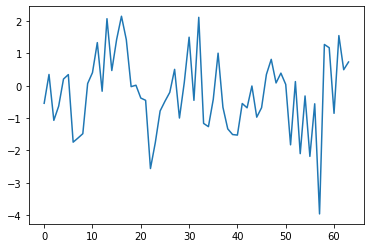

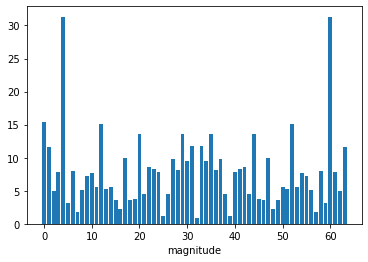

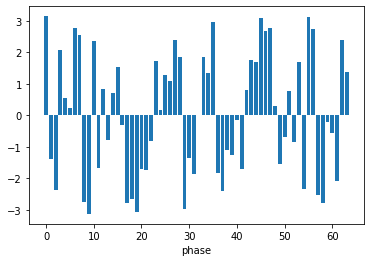

In [116]:
def dft(xn, noise_cancle=True):
    def w_kn(n, N, k):
        return np.exp(1j*2*np.pi*n*k/N)
    N = len(xn)
    basis = [np.array([w_kn(n, N, k) for n in range(N)]) for k in range(N)]
    Xks = np.array([np.dot(w_k.conj().T, xn) for w_k in basis])
    mag = np.sqrt(Xks.real **2 + Xks.imag **2)
    phase =  np.angle(Xks)

    if(noise_cancle):
        Xks [mag < 1e-10] = 0
        phase[mag < 1e-10] = 0 
        mag [mag < 1e-10] = 0
    return Xks, mag, phase
    
def f(n):
    return np.cos(2*np.pi/16 * n + 4*np.pi/16 ) +  np.random.randn()

def mk_xn(f, N=100):
    return np.array([f(n) for n in range(N)])

xn = mk_xn(f, 64)
plot_signal(xn)


xkn, mag, phase = dft(xn)

plt.bar(range(len(mag)), mag)
plt.xlabel('magnitude')
plt.show()    

plt.bar(range(len(phase)), phase)
plt.xlabel('phase')
plt.show()    

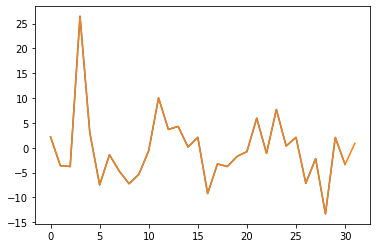

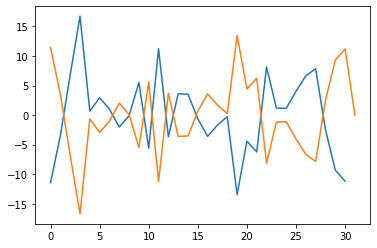

In [117]:
N=len(xkn)
plt.plot(xkn.real[1:N//2])
plt.plot(list(reversed(xkn.real[N//2:])))
plt.show()

plt.plot(xkn.imag[1:N//2])
plt.plot(list(reversed(xkn.imag[N//2:])))
plt.show()

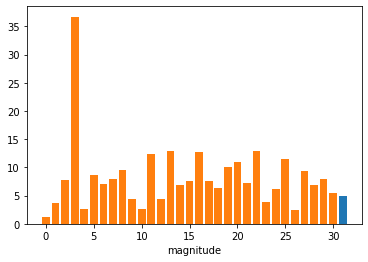

[ 1.19768406  3.72740499  7.75441055 36.7113327   2.5484696   8.57883538
  7.0657087   8.02814369  9.51150922  4.44968787  2.65745656 12.341598
  4.43684546 12.87818139  6.87104236  7.53825625 12.71251496  7.58895765
  6.29552114 10.06108051 10.89529287  7.22030849 12.85832843  3.82653142
  6.10055499 11.57256041  2.49411353  9.42565011  6.86653514  7.94637385
  5.3805864 ]
[1.1976840598238778, 3.7274049876501762, 7.7544105479668755, 36.71133269530775, 2.548469601549405, 8.578835382482144, 7.0657086950259815, 8.028143688534355, 9.51150922473307, 4.449687873743875, 2.657456555680096, 12.341597998999196, 4.436845457467673, 12.878181388953646, 6.871042360885087, 7.538256248370455, 12.712514961324253, 7.588957654140849, 6.295521142059615, 10.06108050884482, 10.895292874028, 7.220308492549503, 12.858328434638667, 3.8265314221919975, 6.100554989139432, 11.572560407664787, 2.494113528514833, 9.425650111252438, 6.866535139296757, 7.946373852158762, 5.38058640457241, 4.8700560715959185]


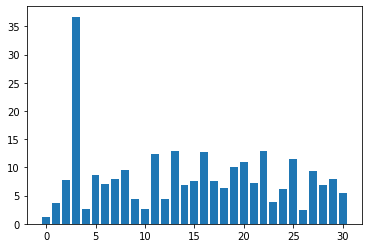

In [92]:
mag_half_neg = mag[1:len(mag)//2]
mag_half_pos = mag[len(mag)//2:]

plt.bar(range(len(mag_half_pos)), list(reversed(mag_half_pos)))
plt.bar(range(len(mag_half_neg)), mag_half_neg)

plt.xlabel('magnitude')
plt.show()    

plt.bar(range(len(mag_half_neg)), mag_half_neg)
print(mag_half_neg)
print(list(reversed(mag_half_pos)))

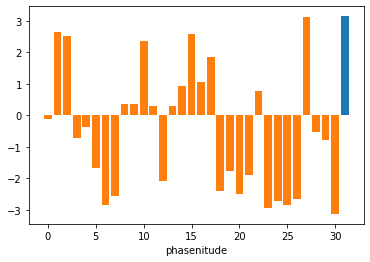

[ 0.11091767 -2.64775532 -2.52685676  0.73610965  0.37717491  1.66466732
  2.84114663  2.5667527  -0.35585516 -0.35168462 -2.35787219 -0.29775416
  2.10190522 -0.28254912 -0.91331224 -2.56258674 -1.05376093 -1.84108891
  2.4041915   1.771419    2.48878982  1.89256877 -0.75994677  2.96007208
  2.73634673  2.85538753  2.65088668 -3.13274077  0.54862978  0.7994646
  3.1330135 ]
[-0.11091767062820933, 2.647755318111141, 2.5268567603925978, -0.7361096504219479, -0.37717491121990593, -1.6646673191485954, -2.8411466317485106, -2.5667527042905522, 0.35585516038137904, 0.35168461510799887, 2.3578721850554634, 0.29775415568052405, -2.1019052173847546, 0.2825491184240385, 0.9133122363767496, 2.562586737252597, 1.053760928951902, 1.8410889067305463, -2.404191501960694, -1.7714189977206458, -2.4887898161800774, -1.8925687735099583, 0.7599467736980953, -2.960072078521274, -2.7363467342351844, -2.855387525072211, -2.650886678110183, 3.1327407677249792, -0.5486297818771184, -0.7994646011291303, -3.133

In [99]:
phase_half_neg = phase[1:len(phase)//2]
phase_half_pos = phase[len(phase)//2:]

plt.bar(range(len(phase_half_pos)), list(reversed(phase_half_pos)))
plt.bar(range(len(phase_half_neg)), -phase_half_neg)

plt.xlabel('phasenitude')
plt.show()    

print(phase_half_neg)
print(list(reversed(phase_half_pos)))

dft symmetric?

## Reference

https://www.coursera.org/learn/dsp1/lecture/qL3Po/1-3-1-b-the-dft-as-a-change-of-basis

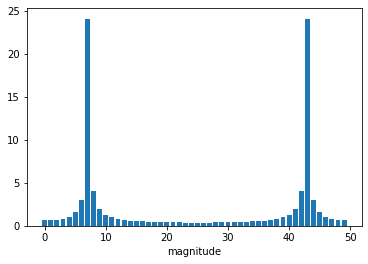

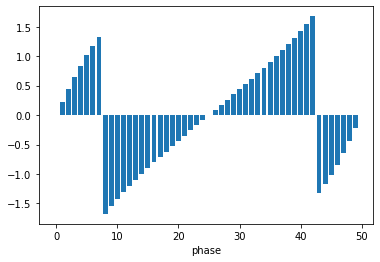

In [33]:
Xks, mag, phase = dft(f, 50)

plt.bar(range(len(mag)), mag)
plt.xlabel('magnitude')
plt.show()    


plt.bar(range(len(phase)), phase)
plt.xlabel('phase')
plt.show()    

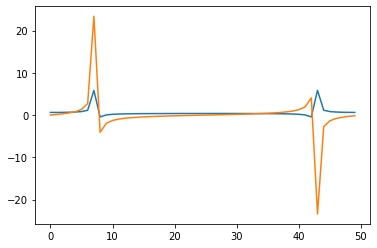

In [37]:
plt.plot(Xks.real)
plt.plot(Xks.imag)